In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv('/content/Sleep.csv')

# New Section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
col = 'Sleep Duration'

mean_val = df[col].mean()
median_val = df[col].median()
mode_val = df[col].mode()[0]  # first mode :contentReference[oaicite:2]{index=2}


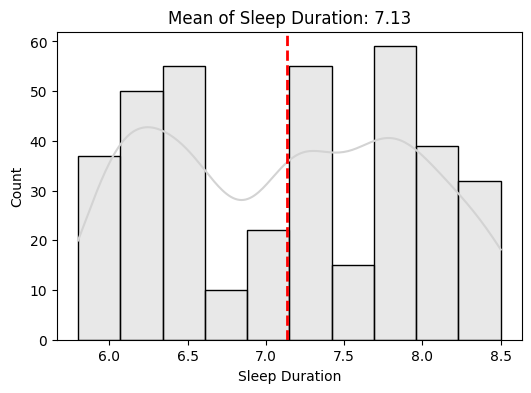

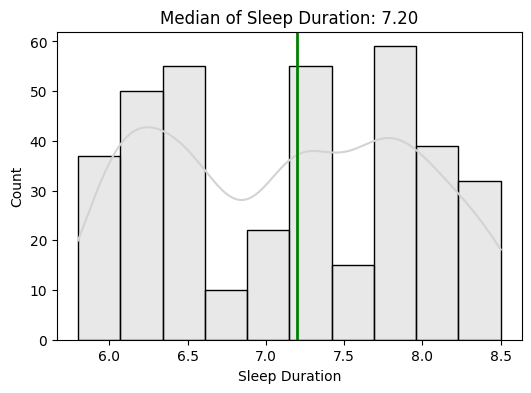

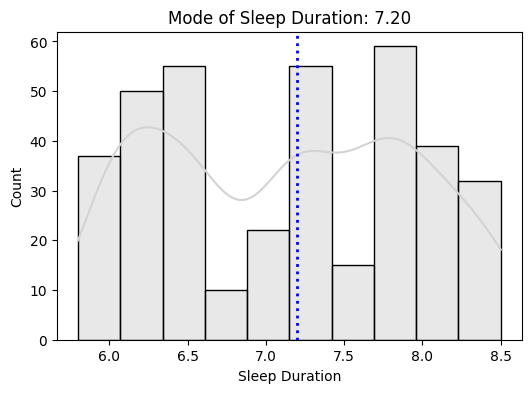

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df[col], kde=True, color='lightgray')
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2)
plt.title(f'Mean of {col}: {mean_val:.2f}')
plt.show()

# Plot Median
plt.figure(figsize=(6, 4))
sns.histplot(df[col], kde=True, color='lightgray')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2)
plt.title(f'Median of {col}: {median_val:.2f}')
plt.show()

# Plot Mode
plt.figure(figsize=(6, 4))
sns.histplot(df[col], kde=True, color='lightgray')
plt.axvline(mode_val, color='blue', linestyle=':', linewidth=2)
plt.title(f'Mode of {col}: {mode_val:.2f}')
plt.show()

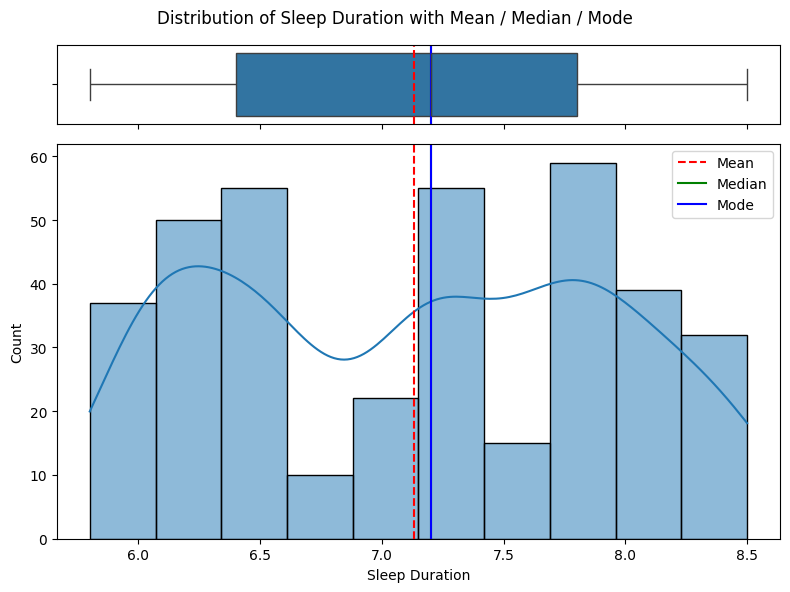

In [ ]:
# Create a figure with a boxplot on top and a histogram with KDE below
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)}, figsize=(8, 6))

sns.boxplot(data=df, x=col, ax=ax_box)
ax_box.axvline(mean_val, color='r', linestyle='--')
ax_box.axvline(median_val, color='g', linestyle='-')
ax_box.axvline(mode_val, color='b', linestyle='-')

sns.histplot(data=df, x=col, ax=ax_hist, kde=True)
ax_hist.axvline(mean_val, color='r', linestyle='--', label='Mean')
ax_hist.axvline(median_val, color='g', linestyle='-', label='Median')
ax_hist.axvline(mode_val, color='b', linestyle='-', label='Mode')
ax_hist.legend()

ax_box.set(xlabel='')
plt.suptitle(f'Distribution of {col} with Mean / Median / Mode')
plt.tight_layout()
plt.show()

Skewness for Sleep Duration: 0.038


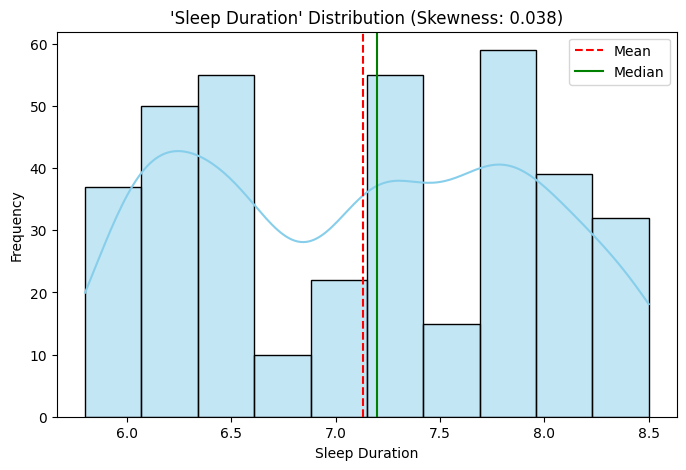

In [ ]:
skewness = df['Sleep Duration'].skew()  # pandas method :contentReference[oaicite:2]{index=2}
print(f"Skewness for Sleep Duration: {skewness:.3f}")

# Plot distribution with histogram + KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['Sleep Duration'], kde=True, color='skyblue')
plt.axvline(df['Sleep Duration'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['Sleep Duration'].median(), color='green', linestyle='-', label='Median')
plt.title(f"'Sleep Duration' Distribution (Skewness: {skewness:.3f})")
plt.legend()
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.show()

Skewness for Sleep Duration: 0.038


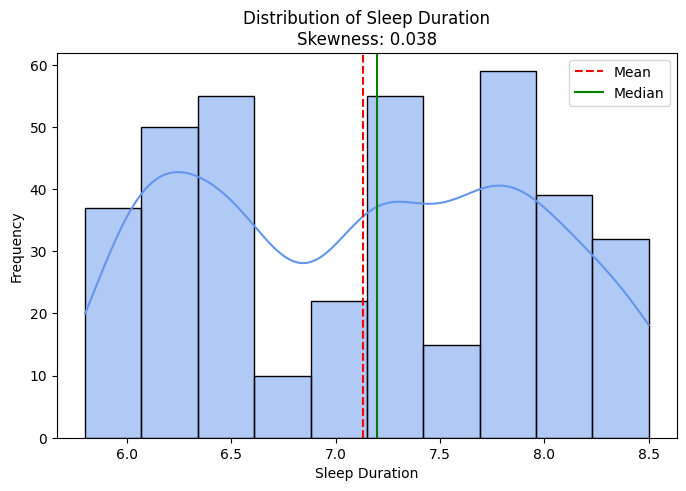

In [ ]:

# Compute skewness using pandas
skewness = df[col].skew()
print(f"Skewness for {col}: {skewness:.3f}")

# Visualize distribution with histogram + KDE
plt.figure(figsize=(8, 5))
sns.histplot(df[col], kde=True, color='cornflowerblue')
plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df[col].median(), color='green', linestyle='-', label='Median')
plt.title(f"Distribution of {col}\nSkewness: {skewness:.3f}")
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
col = 'Quality of Sleep'

mean_val = df[col].mean()
median_val = df[col].median()
mode_val = df[col].mode()

Mean: 7.132085561497325
Median: 7.2
Mode: 7.2
Skewness: 0.037554389846484834


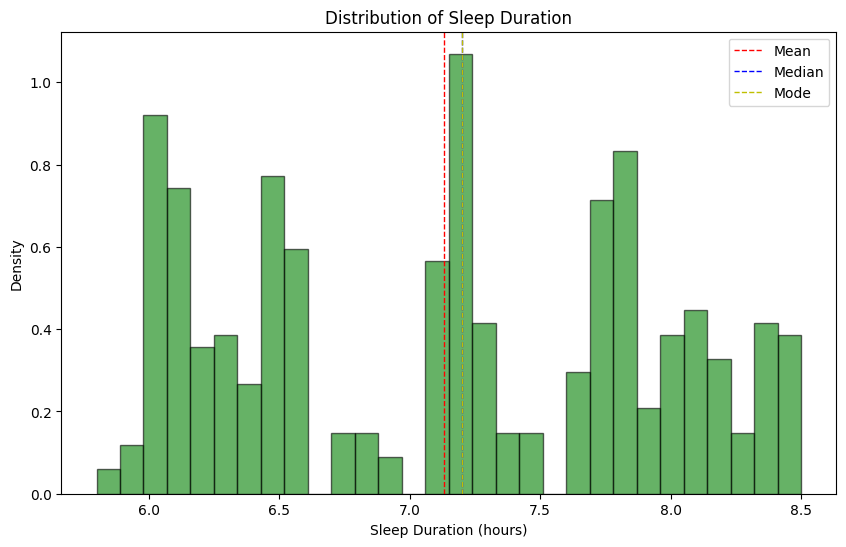

In [ ]:
column_name = 'Sleep Duration'
data_column = df[column_name]

# Calculate mean, median, mode, and skewness
mean_value = data_column.mean()
median_value = data_column.median()
mode_value = data_column.mode()[0]  # mode() returns a Series
skewness_value = data_column.skew()

# Print the calculated values
print(f'Mean: {mean_value}')
print(f'Median: {median_value}')
print(f'Mode: {mode_value}')
print(f'Skewness: {skewness_value}')

# Create a uniform distribution graph
plt.figure(figsize=(10, 6))
plt.hist(data_column, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot mean, median, and mode lines
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_value, color='b', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mode_value, color='y', linestyle='dashed', linewidth=1, label='Mode')

# Add labels and title
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

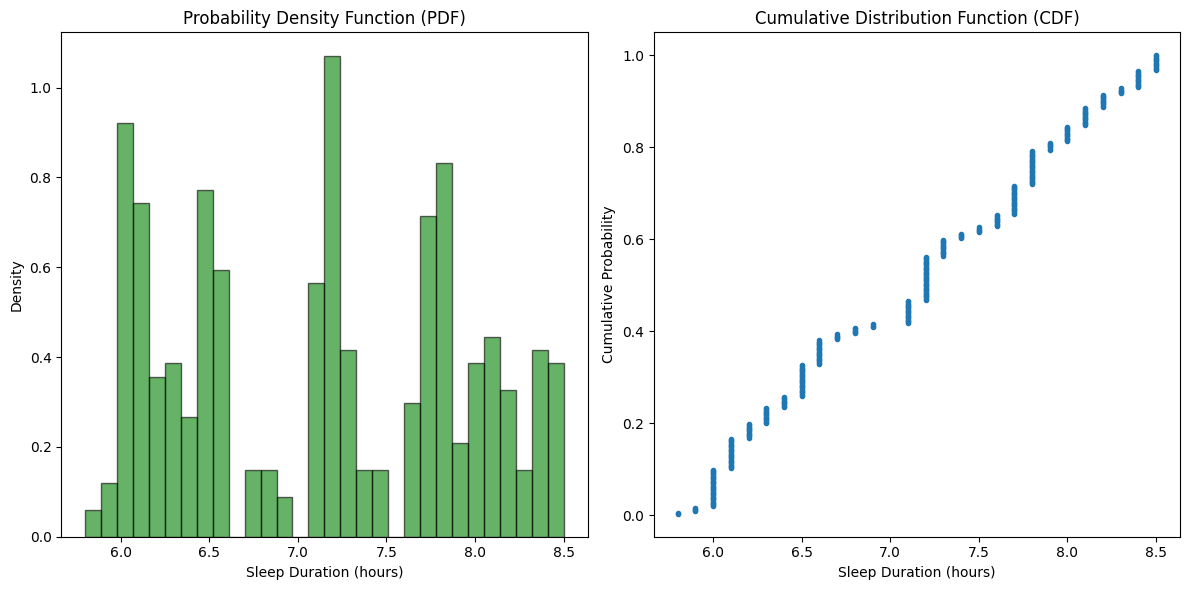

In [ ]:
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.hist(data_column, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Probability Density Function (PDF)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Density')

# Calculate CDF
sorted_data = np.sort(data_column)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Cumulative Probability')

# Show the plots
plt.tight_layout()
plt.show()


=== Sleep Duration Statistics ===
Mean: 7.132
Median: 7.200
Mode: 7.200
Standard Deviation: 0.796
Skewness: 0.038


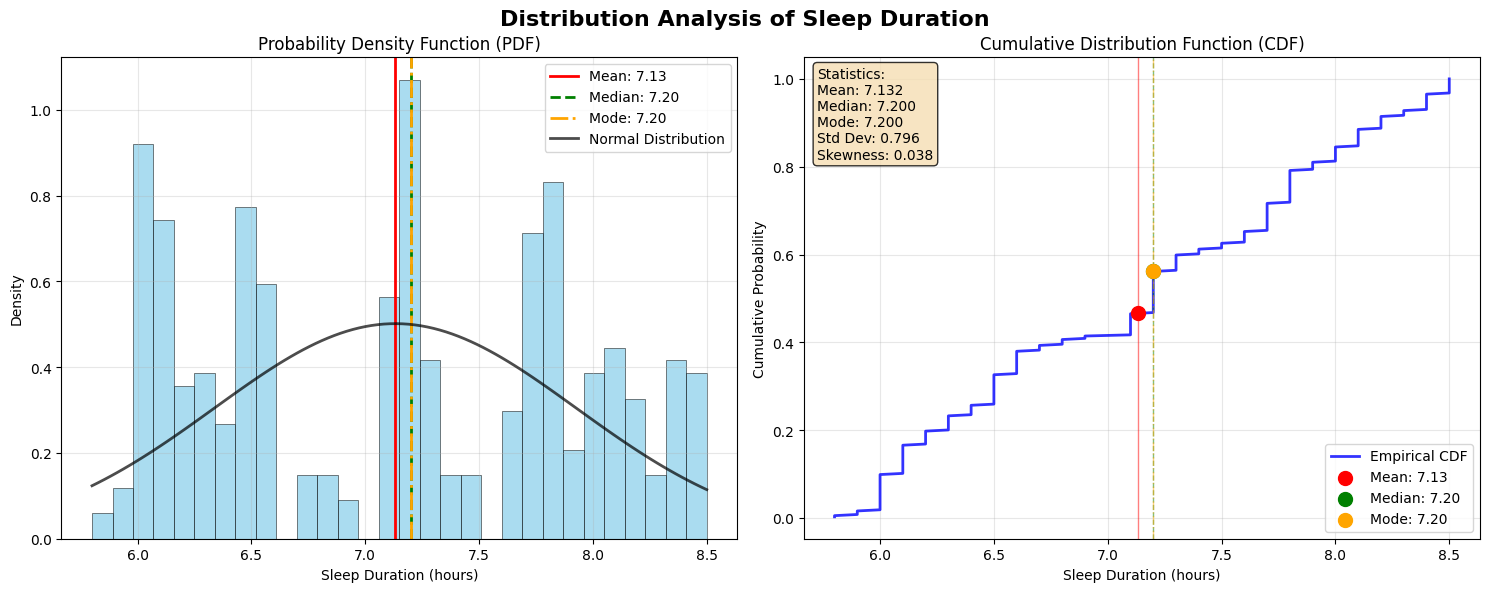


=== Additional Analysis ===
You can analyze other columns by changing the 'column_name' variable to:
Available columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

--- Quick Analysis of Quality of Sleep ---
Mean Quality: 7.31
Median Quality: 7.00
Mode Quality: 8.00
Quality Skewness: -0.207


In [ ]:
column_name = 'Sleep Duration'
data_column = df[column_name].dropna()  # Remove any NaN values

# Calculate statistics
mean_value = data_column.mean()
median_value = data_column.median()
mode_value = data_column.mode()[0]  # Get the first mode if multiple exist
skewness_value = data_column.skew()
std_dev = data_column.std()

# Print statistics
print(f"=== {column_name} Statistics ===")
print(f"Mean: {mean_value:.3f}")
print(f"Median: {median_value:.3f}")
print(f"Mode: {mode_value:.3f}")
print(f"Standard Deviation: {std_dev:.3f}")
print(f"Skewness: {skewness_value:.3f}")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'Distribution Analysis of {column_name}', fontsize=16, fontweight='bold')

# Plot 1: Probability Density Function (PDF)
counts, bins, patches = ax1.hist(data_column, bins=30, density=True, alpha=0.7,
                                color='skyblue', edgecolor='black', linewidth=0.5)

# Add mean, median, mode lines to PDF
ax1.axvline(mean_value, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
ax1.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')
ax1.axvline(mode_value, color='orange', linestyle='-.', linewidth=2, label=f'Mode: {mode_value:.2f}')

# Add normal distribution curve for comparison
x = np.linspace(data_column.min(), data_column.max(), 100)
pdf = stats.norm.pdf(x, mean_value, std_dev)
ax1.plot(x, pdf, 'k-', linewidth=2, alpha=0.7, label='Normal Distribution')

ax1.set_title('Probability Density Function (PDF)')
ax1.set_xlabel(f'{column_name} (hours)')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative Distribution Function (CDF)
sorted_data = np.sort(data_column)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

ax2.plot(sorted_data, cdf, 'b-', linewidth=2, alpha=0.8, label='Empirical CDF')

# Add mean, median, mode points to CDF
mean_cdf = np.interp(mean_value, sorted_data, cdf)
median_cdf = np.interp(median_value, sorted_data, cdf)
mode_cdf = np.interp(mode_value, sorted_data, cdf)

ax2.scatter(mean_value, mean_cdf, color='red', s=100, zorder=5, label=f'Mean: {mean_value:.2f}')
ax2.scatter(median_value, median_cdf, color='green', s=100, zorder=5, label=f'Median: {median_value:.2f}')
ax2.scatter(mode_value, mode_cdf, color='orange', s=100, zorder=5, label=f'Mode: {mode_value:.2f}')

# Add vertical lines for better visualization
ax2.axvline(mean_value, color='red', linestyle='-', linewidth=1, alpha=0.5)
ax2.axvline(median_value, color='green', linestyle='--', linewidth=1, alpha=0.5)
ax2.axvline(mode_value, color='orange', linestyle='-.', linewidth=1, alpha=0.5)

ax2.set_title('Cumulative Distribution Function (CDF)')
ax2.set_xlabel(f'{column_name} (hours)')
ax2.set_ylabel('Cumulative Probability')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add text box with statistics
stats_text = f'Statistics:\nMean: {mean_value:.3f}\nMedian: {median_value:.3f}\nMode: {mode_value:.3f}\nStd Dev: {std_dev:.3f}\nSkewness: {skewness_value:.3f}'
ax2.text(0.02, 0.98, stats_text, transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Additional analysis for other columns
print("\n=== Additional Analysis ===")
print("You can analyze other columns by changing the 'column_name' variable to:")
print("Available columns:", list(df.columns))

# Example: Analyze Quality of Sleep
print("\n--- Quick Analysis of Quality of Sleep ---")
quality_data = df['Quality of Sleep'].dropna()
print(f"Mean Quality: {quality_data.mean():.2f}")
print(f"Median Quality: {quality_data.median():.2f}")
print(f"Mode Quality: {quality_data.mode()[0]:.2f}")
print(f"Quality Skewness: {quality_data.skew():.3f}")

--- Kurtosis Values for Numerical Features ---
Age                       -0.909780
Sleep Duration            -1.286506
Quality of Sleep          -0.748276
Physical Activity Level   -1.266068
Stress Level              -1.327307
Heart Rate                 2.286455
Daily Steps               -0.394031
dtype: float64


/tmp/ipython-input-2515661089.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values, palette='viridis')


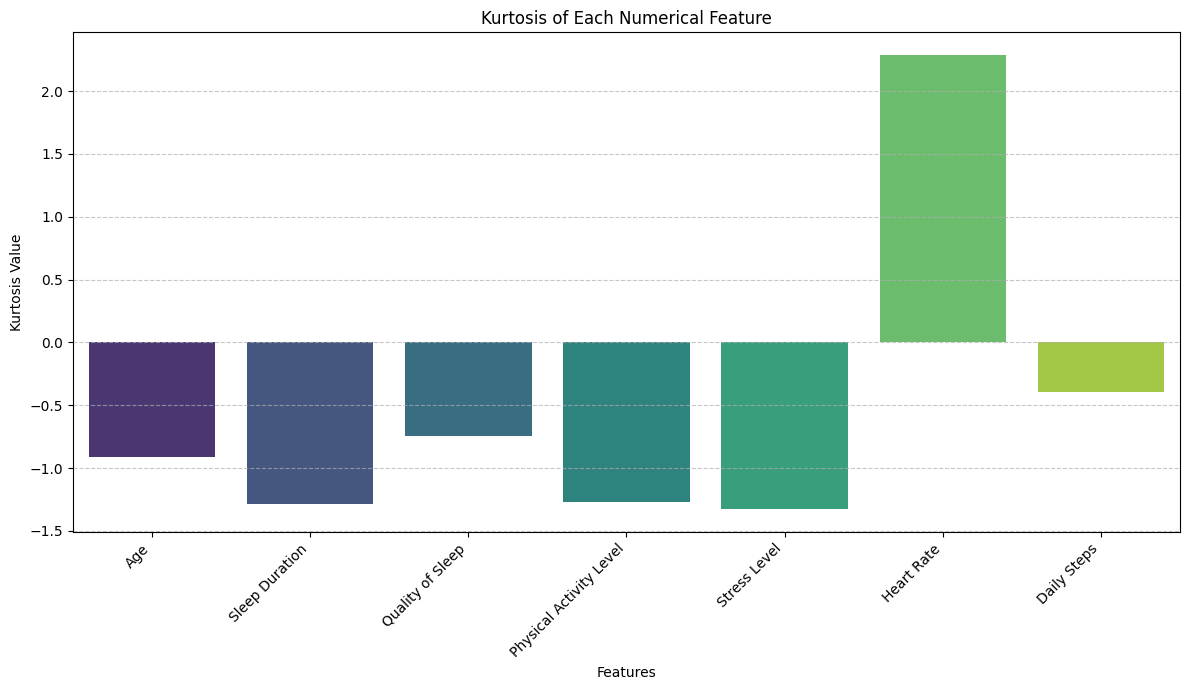

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()


if 'Person ID' in numerical_cols:
    numerical_cols.remove('Person ID')

if not numerical_cols:
    print("No numerical columns found to calculate and plot kurtosis.")
else:

    kurtosis_values = df[numerical_cols].kurtosis()


    print("--- Kurtosis Values for Numerical Features ---")
    print(kurtosis_values)

    # Plotting the kurtosis values
    plt.figure(figsize=(12, 7))
    sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values, palette='viridis')
    plt.title('Kurtosis of Each Numerical Feature')
    plt.xlabel('Features')
    plt.ylabel('Kurtosis Value')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid for better comparison
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
